In [1]:
from src.datasets import read_data

In [91]:
train_pd = read_data("train.csv")
train_pd.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThirdSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
train_pd.loc[949, "BsmtExposure"] = "No"

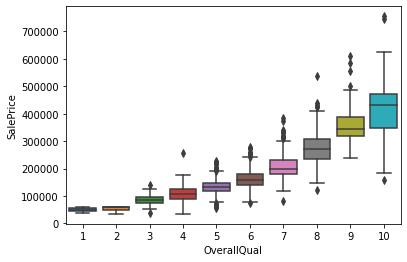

In [5]:
import seaborn as sns
sns.boxplot(x='OverallQual', y = 'SalePrice', data=train_pd)

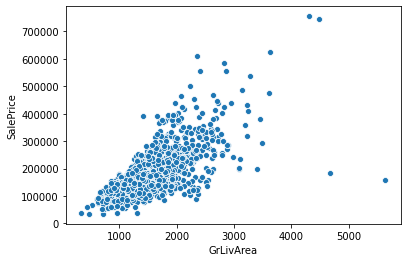

In [6]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_pd)

In [88]:
from statsmodels.stats.outliers_influence import OLSInfluence
ols_influence = OLSInfluence(result)
std_resid = ols_influence.get_resid_studentized_external()

In [126]:
outlier_index = std_resid[np.abs(std_resid) > 10].index
outlier_index

Int64Index([524, 1299], dtype='int64', name='Id')

In [90]:
pd.concat([train_pd.loc[outlier_index]['SalePrice'], result.predict(train_pd).loc[outlier_index]], axis = 1)

,SalePrice,0
Id,,
179,501837,415789.163062
319,260000,345556.152240
441,555000,438708.312574
474,440000,350743.649957
524,184750,509822.735445
589,143000,241872.683313
633,82500,171198.068783
689,392000,285724.509171
692,755000,550820.391744


In [ ]:
std_resid[]

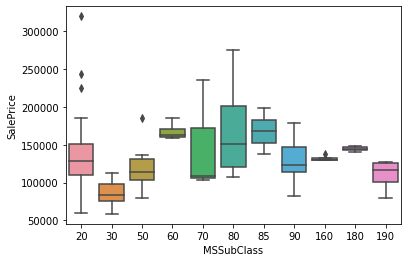

In [32]:
sns.boxplot(x='MSSubClass', y = 'SalePrice', data=train_pd[train_pd['Neighborhood'] == 'Edwards'])

In [112]:
outlier_index

Int64Index([ 179,  319,  441,  474,  524,  589,  633,  689,  692,  770,  775,
             804,  899, 1047, 1170, 1182, 1183, 1299, 1325],
           dtype='int64', name='Id')

In [127]:
drop_trainpd = train_pd.drop(outlier_index)

In [128]:
drop_trainpd.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
           dtype='int64', name='Id', length=1458)

In [129]:
from src.preprocess import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
null_imputer = NullImputer()
remove_imputer = RemovelColsImputer()
ohe_imputer = MyOneHotEncode()
standard_scaler = MyStandardScaler()

imputer = Pipeline([('null_imputer', null_imputer), ("remove_imputer", remove_imputer),
                    ("one_hot", ohe_imputer), ("standard_scaler", standard_scaler)])
    
selected_cols = ['OverallQual', 'Neighborhood', 'GrLivArea', 'OverallCond', 'YearBuilt', 'MSSubClass', 'GarageCars', 'BsmtExposure', 'SaleCondition', 'LotArea', 'KitchenQual', 'BsmtFinType1', 'ScreenPorch', 'BsmtQual', 'WoodDeckSF']
X = drop_trainpd[selected_cols]
y = drop_trainpd[train_pd.columns[-1]]
imputer.fit(X)
X_new = imputer.transform(X)
X_new.head(5)


24
24
24
24


,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,Neighborhood_Blueste,...,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,ScreenPorch,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,WoodDeckSF
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.045408,-0.117933,-0.294004,-0.611699,-0.587383,1.889585,-0.360877,-0.174324,-0.105336,-0.037062,...,-0.231232,-0.161363,-0.316824,-0.646752,-0.270407,-0.156831,1.165857,-0.161363,-0.895670,-0.750831
2,-0.045408,-0.117933,-0.294004,-0.611699,1.702468,-0.529217,-0.360877,-0.174324,-0.105336,-0.037062,...,-0.231232,-0.161363,-0.316824,-0.646752,-0.270407,-0.156831,1.165857,-0.161363,-0.895670,1.627328
3,-0.045408,-0.117933,-0.294004,-0.611699,-0.587383,1.889585,-0.360877,-0.174324,-0.105336,-0.037062,...,-0.231232,-0.161363,-0.316824,-0.646752,-0.270407,-0.156831,1.165857,-0.161363,-0.895670,-0.750831
4,-0.045408,-0.117933,-0.294004,-0.611699,-0.587383,1.889585,-0.360877,-0.174324,-0.105336,-0.037062,...,-0.231232,-0.161363,-0.316824,-0.646752,-0.270407,-0.156831,-0.857738,-0.161363,1.116482,-0.750831
5,-0.045408,-0.117933,-0.294004,-0.611699,-0.587383,-0.529217,2.771024,-0.174324,-0.105336,-0.037062,...,-0.231232,-0.161363,-0.316824,-0.646752,-0.270407,-0.156831,1.165857,-0.161363,-0.895670,0.781406


In [134]:
from sklearn.linear_model import LassoCV, Lasso, Ridge, RidgeCV
reg_lasso = Lasso(alpha=1).fit(X_new, y)
lassocv = Lasso(alpha=0)


In [139]:
reg_lasso.coef_

array([-1.32867623e+02, -3.58850341e+02, -3.46260461e+02, -5.69712438e+02,
        1.14508578e+03,  5.38869500e+03,  9.84082646e+03,  1.21097618e+04,
        1.26843802e+04,  4.14486364e+02,  1.34086936e+03,  2.64601279e+03,
        4.26930418e+02,  1.46867719e+03,  5.94445418e+03, -1.70938076e+02,
        1.00010347e+03,  3.34156755e+02, -3.98843042e+01, -4.13059973e+02,
        7.41616672e+02,  1.33893242e+03, -6.17601398e+00,  6.55340944e+03,
        4.75362775e+03, -4.77626869e+02,  1.75003613e+02,  2.34831282e+02,
        1.02232552e+03,  4.00947999e+03,  5.49842431e+03, -3.91699007e+02,
        1.86761840e+03,  3.44825525e+04,  9.14265935e+02,  2.13616703e+03,
        6.09707527e+03,  1.88779185e+04,  1.74492089e+04,  1.82314877e+04,
        1.16825983e+04,  8.20247841e+03,  1.51621299e+04,  2.07181436e+02,
       -1.77580082e+02,  2.46573898e+02, -3.34621720e+03, -5.29382930e+03,
       -2.65726412e+03, -2.25180488e+03, -1.57975632e+03, -7.01554798e+02,
       -5.28196864e+03, -

In [130]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import mean_squared_log_error, make_scorer, mean_squared_error
lasso = Lasso()
parameters = {"alpha" : list(np.arange(0, 1, 0.1)) + list(np.arange(1, 50, 1))}
scoring = make_scorer(mean_squared_log_error, greater_is_better=False)
cv = ShuffleSplit(10, random_state=0)
reg = GridSearchCV(lasso, parameters, scoring, cv=cv).fit(X_new, y)


In [131]:
reg.best_estimator_

Lasso(alpha=49, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [138]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error
predict_v = reg_lasso.predict(X_new)
real_v = y
mean_squared_log_error(real_v, predict_v)


0.014842508029386723

In [ ]:
0.016271970841780267

In [8]:
len([u for u in reg_lasso.coef_ if u > 0])

46

In [135]:
test_pd = read_data("test.csv")
test_pd.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [136]:
test_pd.loc[1488, "BsmtExposure"] = "No"
test_pd.loc[2349, "BsmtExposure"] = "No"

In [137]:
test_pd = test_pd[selected_cols]
test_pd = imputer.transform(test_pd)
test_result = pd.Series(reg_lasso.predict(test_pd), name='SalePrice')
test_result = pd.concat([pd.Series(test_pd.index, name="Id"), test_result], axis=1)
print(test_result)
output_path = os.path.abspath(os.path.join(os.path.abspath(''), "../outputs"))
test_result.to_csv(os.path.join(output_path, "lassocv_remove_outliers.csv"), index=False)

Id      SalePrice
0     1461  123928.953829
1     1462  161550.399598
2     1463  182760.036817
3     1464  194391.294793
4     1465  223250.369539
...    ...            ...
1454  2915   84787.663291
1455  2916   73651.692391
1456  2917  149035.399347
1457  2918  127928.289430
1458  2919  215641.992640

[1459 rows x 2 columns]


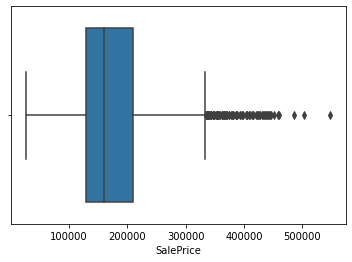

In [31]:
import seaborn as sns
sns.boxplot(test_result['SalePrice'])

In [32]:
test_result['SalePrice'].describe()

count      1459.000000
mean     179727.394375
std       76954.747186
min       26478.182042
25%      128668.210443
50%      160871.978636
75%      210307.798033
max      547886.915480
Name: SalePrice, dtype: float64

In [24]:
reg.mse_path_[58]

array([0.08153611, 0.11396245, 0.09948267, 0.27244081, 0.24423228,
       0.13399751, 0.09668458, 0.08871715, 0.46476545, 0.08512378])

In [ ]:
predict_v = reg.predict

In [34]:
from src.process_functions import *
imputer = get_imputer(train_pd)
train_pd = imputer.transform(train_pd)
model_ = get_model(ModelOLSStats, train_pd, imputer.steps[0][1].col_levels)

24
24


In [74]:

result = model_.fit(selected_cols).result_

In [37]:
result.params

Intercept                                                     -784393.120146
C(OverallQual, levels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])[T.2]    -19894.698580
C(OverallQual, levels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])[T.3]    -19480.504744
C(OverallQual, levels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])[T.4]    -15512.483265
C(OverallQual, levels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])[T.5]    -13381.036905
                                                                   ...      
GrLivArea                                                          56.597010
YearBuilt                                                         420.278270
LotArea                                                             0.455564
ScreenPorch                                                        64.543255
WoodDeckSF                                                         15.515888
Length: 63, dtype: float64

In [82]:
np.sqrt(get_cv_score(model_, selected_cols))

0.14093863572334

In [10]:
result2 = model_.fit(['GrLivArea']).result_
y_hat = result2.predict(train_pd['GrLivArea'])

In [6]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sat, 04 Apr 2020   Prob (F-statistic):          4.52e-223
Time:                        18:25:05   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
coefs = result2.params

In [7]:
get_cv_score(model_, ['GrLivArea'])

0.07687393434522276

In [29]:
result.params

Intercept                                                     -596666.916082
C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])[T.6]      6504.977291
C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])[T.7]     18148.669473
C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])[T.8]     34964.264338
C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])[T.4]      -833.919023
                                                                   ...      
GrLivArea                                                          52.576437
YearBuilt                                                         333.386186
LotArea                                                             0.394679
ScreenPorch                                                        62.570812
WoodDeckSF                                                         16.242326
Length: 87, dtype: float64

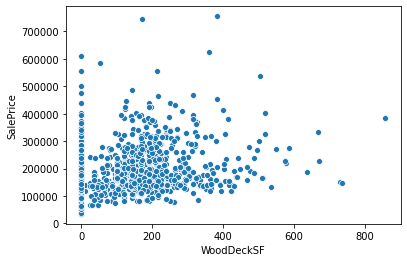

In [80]:
seaborn.scatterplot(x='WoodDeckSF', y='SalePrice', data=train_pd)

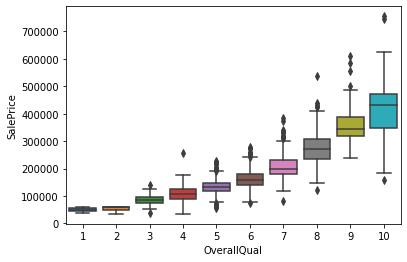

In [52]:
seaborn.boxplot(x='OverallQual', y='SalePrice', data=train_pd)

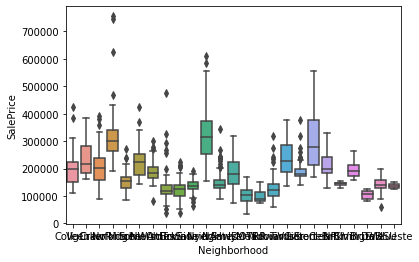

In [53]:
seaborn.boxplot(x='Neighborhood', y='SalePrice', data=train_pd)

In [63]:
train_pd.groupby('Neighborhood').agg({"SalePrice": ["mean", "count", "min", "max"]})

SalePrice                      
                       mean count     min     max
Neighborhood                                     
Blmngtn       194870.882353    17  159895  264561
Blueste       137500.000000     2  124000  151000
BrDale        104493.750000    16   83000  125000
BrkSide       124834.051724    58   39300  223500
ClearCr       212565.428571    28  130000  328000
CollgCr       197965.773333   150  110000  424870
Crawfor       210624.725490    51   90350  392500
Edwards       128219.700000   100   58500  320000
Gilbert       192854.506329    79  141000  377500
IDOTRR        100123.783784    37   34900  169500
MeadowV        98576.470588    17   75000  151400
Mitchel       156270.122449    49   84500  271000
NAmes         145847.080000   225   87500  345000
NPkVill       142694.444444     9  127500  155000
NWAmes        189050.068493    73   82500  299800
NoRidge       335295.317073    41  190000  755000
NridgHt       316270.623377    77  154000  611657
OldTown       128225.300885   113   37900  475000
SWISU         142591.360000    25   60000  200000
Sawyer        136793.135135    74   62383  190000
SawyerW       186555.796610    59   76000  320000
Somerst       225379.837209    86  144152  423000
StoneBr       310499.000000    25  170000  556581
Timber        242247.447368    38  137500  378500
Veenker       238772.727273    11  162500  385000

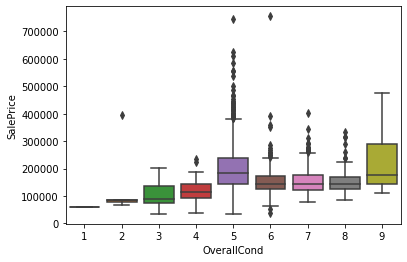

In [65]:
seaborn.boxplot(x='OverallCond', y='SalePrice', data=train_pd)

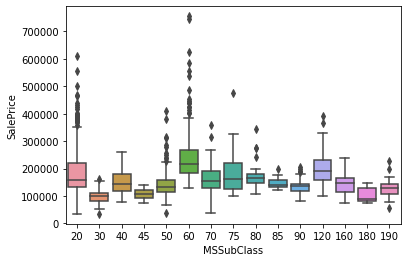

In [70]:
seaborn.boxplot(x='MSSubClass', y='SalePrice', data=train_pd)

In [79]:
train_pd.groupby('MSSubClas').agg({"SalePrice": ["mean", "count", "min", "max"]})

SalePrice                      
                     mean count     min     max
MSSubClass                                     
20          185224.811567   536   35311  611657
30           95829.724638    69   34900  163500
40          156125.000000     4   79500  260000
45          108591.666667    12   76000  139400
50          143302.972222   144   37900  410000
60          239948.501672   299  129000  755000
70          166772.416667    60   40000  359100
75          192437.500000    16  101000  475000
80          169736.551724    58  107000  345000
85          147810.000000    20  123000  198500
90          133541.076923    52   82000  206300
120         200779.080460    87   99500  392500
160         138647.380952    63   75000  239000
180         102300.000000    10   75500  148000
190         129613.333333    30   55000  228950

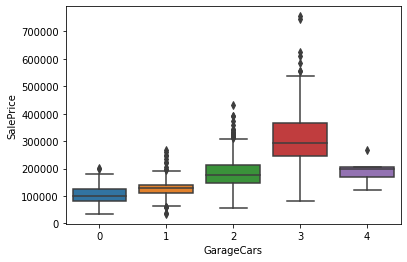

In [73]:
seaborn.boxplot(x='GarageCars', y='SalePrice', data=train_pd)

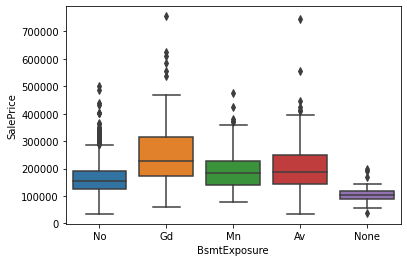

In [74]:
seaborn.boxplot(x='BsmtExposure', y='SalePrice', data=train_pd)

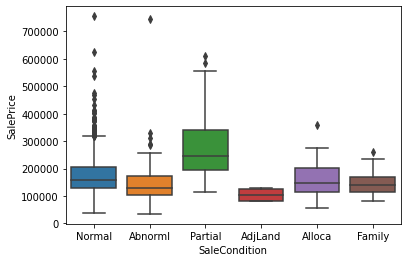

In [75]:
seaborn.boxplot(x='SaleCondition', y='SalePrice', data=train_pd)

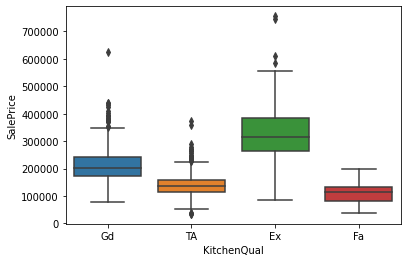

In [76]:
seaborn.boxplot(x='KitchenQual', y='SalePrice', data=train_pd)

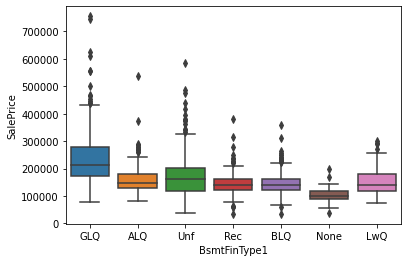

In [77]:
seaborn.boxplot(x='BsmtFinType1', y='SalePrice', data=train_pd)

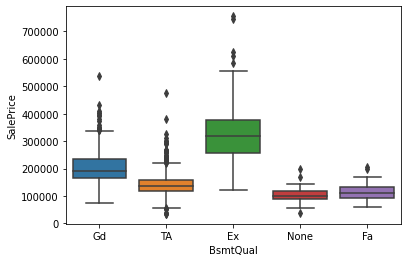

In [78]:
seaborn.boxplot(x='BsmtQual', y='SalePrice', data=train_pd)

In [ ]:
seaborn.boxplot(x='LotArea', y='SalePrice', data=train_pd[train_pd['LotArea'] < 50000])

In [23]:
category = [x for x in selected_cols if len(model_.col_levels[x]) > 0]
category

['OverallQual',
 'Neighborhood',
 'OverallCond',
 'MSSubClass',
 'GarageCars',
 'BsmtExposure',
 'SaleCondition',
 'KitchenQual',
 'BsmtFinType1',
 'BsmtQual']

In [25]:
quant = [x for x in selected_cols if len(model_.col_levels[x]) == 0]
quant

['GrLivArea', 'YearBuilt', 'LotArea', 'ScreenPorch', 'WoodDeckSF']

In [30]:
result.params[quant]

GrLivArea       52.576437
YearBuilt      333.386186
LotArea          0.394679
ScreenPorch     62.570812
WoodDeckSF      16.242326
dtype: float64

In [31]:
train_pd[quant].describe()

,GrLivArea,YearBuilt,LotArea,ScreenPorch,WoodDeckSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,10516.828082,15.060959,94.244521
std,525.480383,30.202904,9981.264932,55.757415,125.338794
min,334.000000,1872.000000,1300.000000,0.000000,0.000000
25%,1129.500000,1954.000000,7553.500000,0.000000,0.000000
50%,1464.000000,1973.000000,9478.500000,0.000000,0.000000
75%,1776.750000,2000.000000,11601.500000,0.000000,168.000000
max,5642.000000,2010.000000,215245.000000,480.000000,857.000000


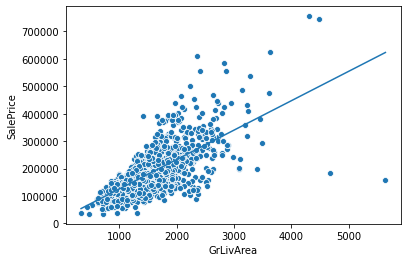

In [11]:
import seaborn 
seaborn.scatterplot(x='GrLivArea', y='SalePrice', data=train_pd)
seaborn.lineplot(x=train_pd['GrLivArea'], y=y_hat)

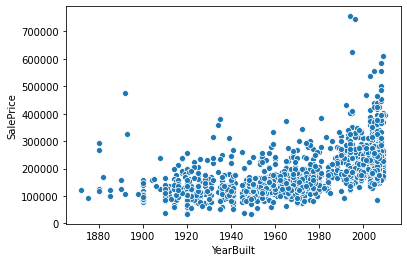

In [27]:
seaborn.scatterplot(x='YearBuilt', y='SalePrice', data=train_pd)

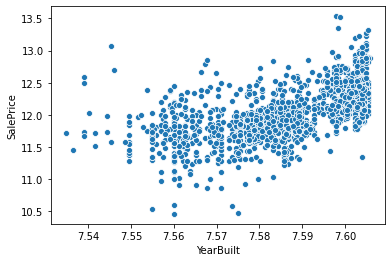

In [63]:
seaborn.scatterplot(x=numpy.log(train_pd['YearBuilt']), y=numpy.log(train_pd['SalePrice']))

In [40]:
train_pd[train_pd['ScreenPorch'] ==0]['SalePrice'].describe()

count      1344.000000
mean     178888.061756
std       78332.938257
min       34900.000000
25%      128500.000000
50%      160000.000000
75%      213062.500000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
from code_preprocessing.cv_model import *
from code_preprocessing.datasets import read_data
from sklearn.model_selection import cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.metrics import mean_squared_log_error, make_scorer
imputer = preprocess(train_pd)
train_pd = imputer.transform(train_pd)
model_ = get_model(ModelOLSStats, train_pd)



In [7]:
model_.tss

9207911334609.977

In [8]:
result_fit2 = model_.fit(['Condition2', 'OverallQual'])

In [9]:
result_fit = model_.fit(selected_cols)

In [10]:
model_.cv_score(result_fit2)

3281289257699.208

In [11]:
train_pd['SalePrice'].iloc[1]

181500

In [14]:
from code_preprocessing.selection_strategy import MyAnova
table = MyAnova.anova_lm(model_, None, result_fit)
table

AttributeError: 'NoneType' object has no attribute 'cols'

In [15]:
anova_lm(result_fit, result_fit2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1452.0,9.116761e+12,0.0,NaN,NaN,NaN
1,1443.0,2.824574e+12,9.0,6.292187e+12,357.168017,0.0


In [12]:
cv_model = SMWrapper(model_, selected_cols)
cv = ShuffleSplit(n_splits=10, random_state=0)
score = make_scorer(mean_squared_log_error, greater_is_better=False)
cv_score = -np.mean(cross_val_score(cv_model, model_.data, model_.data[model_.target_col], cv=5, scoring=score))
cv_score

0.16567018053915822

In [15]:
cv_model = SMWrapper(model_, selected_cols)
cv = ShuffleSplit(n_splits=10, random_state=0)
score = make_scorer(mean_squared_log_error, greater_is_better=False)
y_pred = cross_val_predict(cv_model, model_.data, model_.data[model_.target_col], cv=2)

In [18]:
[i for i in range(0, 1460) if y_pred[i] < 0]

[825]

In [21]:
train_pd.loc[825][selected_cols]

OverallQual           10
Neighborhood     NridgHt
GrLivArea           2084
BsmtFinSF1          1636
OverallCond            5
YearBuilt           2007
MSSubClass            20
RoofMatl         CompShg
GarageCars             3
SaleCondition    Partial
LotArea            14803
Functional           Typ
KitchenQual           Ex
BsmtExposure          Av
TotalBsmtSF         2078
BsmtQual              Ex
Condition2          PosN
Condition1          PosN
ScreenPorch            0
FullBath               2
Exterior1st      CemntBd
LotConfig         Inside
Name: 825, dtype: object

In [30]:
train_pd.loc[825]['SalePrice']

385000

In [32]:
train_pd['SalePrice'].agg(['max', 'min'])

max    755000
min     34900
Name: SalePrice, dtype: int64

In [19]:
mean_squared_log_error(model_.data[model_.target_col], y_pred)

0.013211212552934618

In [6]:
cv_model.result_

AttributeError: 'SMWrapper' object has no attribute 'result_'

In [21]:
train_pd.iloc[0: 730]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,None,Reg,Lvl,Inside,Gtl,...,61,0,0,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,None,Reg,Lvl,FR2,Gtl,...,0,0,0,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,None,IR1,Lvl,Inside,Gtl,...,42,0,0,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,None,IR1,Lvl,Corner,Gtl,...,35,272,0,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,None,IR1,Lvl,FR2,Gtl,...,84,0,0,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,20,RL,60.000000,6960,None,Reg,Lvl,Inside,Gtl,...,0,0,0,None,500,11,2009,WD,Normal,120500
726,727,20,RL,70.049958,21695,None,IR1,Lvl,Corner,Gtl,...,44,0,0,None,0,12,2009,WD,Normal,222000
727,728,20,RL,64.000000,7314,None,Reg,Lvl,Inside,Gtl,...,0,0,0,None,0,2,2009,WD,Normal,194500
728,729,90,RL,85.000000,11475,None,Reg,Lvl,Corner,Gtl,...,25,0,0,None,0,7,2009,COD,Abnorml,110000


In [22]:
tmp_model = copy.deepcopy(model_)
tmp_model.data = model_.data.iloc[0: 730]
r = tmp_model.fit(selected_cols)
tmp_model.score(r)

SalePrice ~ C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])+C(Neighborhood, levels=['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert', 'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW', 'BrkSide', 'Crawfor', 'Mitchel', 'NoRidge', 'Timber', 'IDOTRR', 'ClearCr', 'StoneBr', 'SWISU', 'MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'])+GrLivArea+BsmtFinSF1+C(OverallCond, levels=[5, 6, 7, 8, 4, 3, 9, 2, 1])+YearBuilt+C(MSSubClass, levels=[20, 60, 50, 120, 30, 160, 70, 80, 90, 190, 85, 75, 45, 180, 40])+C(RoofMatl, levels=['CompShg', 'Tar&Grv', 'WdShngl', 'WdShake', 'Metal', 'Roll', 'Membran', 'ClyTile'])+C(GarageCars, levels=[2, 1, 3, 0, 4])+C(SaleCondition, levels=['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'])+LotArea+C(Functional, levels=['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', 'Maj2', 'Sev'])+C(KitchenQual, levels=['TA', 'Gd', 'Ex', 'Fa'])+C(BsmtExposure, levels=['No', 'Av', 'Gd', 'Mn', 'None'])+TotalBsmtSF+C(BsmtQual, levels=['TA', 'Gd', 'Ex', 'No

0.012472853458854842

In [24]:
r.params

Intercept                                                     -717388.242318
C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])[T.6]      4863.539049
C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])[T.7]     13007.455651
C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])[T.8]     32556.194226
C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])[T.4]      -965.917762
                                                                   ...      
BsmtFinSF1                                                         21.117075
YearBuilt                                                         378.385859
LotArea                                                             0.422210
TotalBsmtSF                                                        15.983898
ScreenPorch                                                        32.803267
Length: 131, dtype: float64

In [41]:
from patsy.contrasts import Treatment
contrast = Treatment(reference=0)

In [7]:
formula = "SalePrice ~ C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])+C(Neighborhood, levels=['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert', 'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW', 'BrkSide', 'Crawfor', 'Mitchel', 'NoRidge', 'Timber', 'IDOTRR', 'ClearCr', 'StoneBr', 'SWISU', 'MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'])+GrLivArea+BsmtFinSF1+C(OverallCond, levels=[5, 6, 7, 8, 4, 3, 9, 2, 1])+YearBuilt+C(MSSubClass, levels=[20, 60, 50, 120, 30, 160, 70, 80, 90, 190, 85, 75, 45, 180, 40])+C(RoofMatl, levels=['CompShg', 'Tar&Grv', 'WdShngl', 'WdShake', 'Metal', 'Roll', 'Membran', 'ClyTile'])+C(GarageCars, levels=[2, 1, 3, 0, 4])+C(SaleCondition, levels=['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'])+LotArea+C(Functional, levels=['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', 'Maj2', 'Sev'])+C(KitchenQual, levels=['TA', 'Gd', 'Ex', 'Fa'])+C(BsmtExposure, levels=['No', 'Av', 'Gd', 'Mn', 'None'])+TotalBsmtSF+C(BsmtQual, levels=['TA', 'Gd', 'Ex', 'None', 'Fa'])+C(Condition2, levels=['Norm', 'Feedr', 'RRNn', 'PosN', 'Artery', 'RRAn', 'PosA', 'RRAe'])+C(Condition1, levels=['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe'])+ScreenPorch+C(FullBath, levels=[2, 1, 3, 0])+C(Exterior1st, levels=['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood', 'CemntBd', 'BrkFace', 'WdShing', 'Stucco', 'AsbShng', 'Stone', 'BrkComm', 'ImStucc', 'CBlock', 'AsphShn'])+C(LotConfig, levels=['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'])"

In [30]:
import patsy
x = patsy.dmatrices(formula, train_pd.iloc[[825]][selected_cols + ['SalePrice']], return_type="dataframe")[1]

In [33]:
x.iloc[0]

Intercept                                                          1.0
C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])[T.6]        0.0
C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])[T.7]        0.0
C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])[T.8]        0.0
C(OverallQual, levels=[5, 6, 7, 8, 4, 9, 3, 10, 2, 1])[T.4]        0.0
                                                                ...   
BsmtFinSF1                                                      1636.0
YearBuilt                                                       2007.0
LotArea                                                        14803.0
TotalBsmtSF                                                     2078.0
ScreenPorch                                                        0.0
Name: 825, Length: 131, dtype: float64

In [49]:
tmp = pd.concat([x.iloc[0], r.params], axis = 1)[825] * pd.concat([x.iloc[0], r.params], axis = 1)[0]

In [50]:
tmp[tmp < 0]

Intercept                                                                                                                                                                                             -717388.242318
C(Condition2, levels=['Norm', 'Feedr', 'RRNn', 'PosN', 'Artery', 'RRAn', 'PosA', 'RRAe'])[T.PosN]                                                                                                     -454378.895785
C(Exterior1st, levels=['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood', 'CemntBd', 'BrkFace', 'WdShing', 'Stucco', 'AsbShng', 'Stone', 'BrkComm', 'ImStucc', 'CBlock', 'AsphShn'])[T.CemntBd]     -1348.857502
dtype: float64

In [56]:
train_pd[train_pd['Condition2'] == "PosN"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,None,IR1,Bnk,Inside,Gtl,...,406,0,0,None,0,10,2007,New,Partial,184750
825,826,20,RL,114.0,14803,None,Reg,Lvl,Inside,Gtl,...,45,0,0,None,0,6,2008,New,Partial,385000


In [61]:
len(train_pd)

1460

In [60]:
rank_cols = RankColumns()
rank_cols.cal_fpvalue_special_col(train_pd, 'Condition2')

0.03774804420194121

In [36]:
r.predict(train_pd.iloc[[825]])

825   -4026.423822
dtype: float64

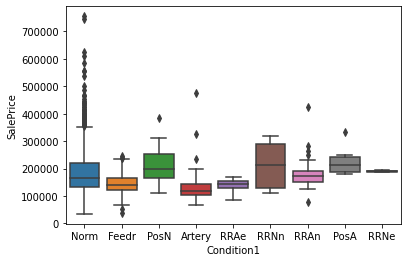

In [58]:
import seaborn as sns
sns.boxplot(x='Condition1', y='SalePrice', data=train_pd)

In [59]:
train_pd['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [12]:
from statsmodels.formula.api import ols
model = ols('SalePrice~C(OverallQual)', data=train_pd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     349.0
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:31:19   Log-Likelihood:                -17703.
No. Observations:                1460   AIC:                         3.543e+04
Df Residuals:                    1450   BIC:                         3.548e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.015e+04   3.17e+04      1.584      0.113    -1.2e+04    1.12e+05
C(OverallQual)[T.2]   1620.3333   4.09e+04      0.040      0.968   -7.86e+04    8.18e+04
C(OverallQual)[T.3]   3.732e+04   3.32e+04      1.124      0.261   -2.78e+04    1.02e+05
C(OverallQual)[T.4]   5.827e+04   3.19e+04      1.824      0.068   -4379.660    1.21e+05
C(OverallQual)[T.5]   8.337e+04   3.17e+04      2.626      0.009    2.11e+04    1.46e+05
C(OverallQual)[T.6]   1.115e+05   3.18e+04      3.510      0.000    4.92e+04    1.74e+05
C(OverallQual)[T.7]   1.576e+05   3.18e+04      4.960      0.000    9.53e+04     2.2e+05
C(OverallQual)[T.8]   2.246e+05   3.19e+04      7.050      0.000    1.62e+05    2.87e+05
C(OverallQual)[T.9]   3.174e+05   3.24e+04      9.797      0.000    2.54e+05    3.81e+05
C(OverallQual)[T.10]  3.884e+05   3.34e+04     11.637      0.000    3.23e+05    4.54e+05
==============================================================================
Omnibus:                      377.831   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3528.673
Skew:                           0.929   Prob(JB):                         0.00
Kurtosis:                      10.386   Cond. No.                         94.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
import math
math.sqrt(model.ssr)

1705294.9036644984

In [21]:
model2 = ols('SalePrice~OverallQual^2 + OverallQual', data=train_pd).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1314.
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:37:43   Log-Likelihood:                -17791.
No. Observations:                1460   AIC:                         3.559e+04
Df Residuals:                    1457   BIC:                         3.560e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.079e+05   5785.548    -18.644      0.000   -1.19e+05   -9.65e+04
OverallQual ^ 2  5445.6040    640.604      8.501      0.000    4188.999    6702.209
OverallQual      4.191e+04    989.761     42.345      0.000       4e+04    4.39e+04
==============================================================================
Omnibus:                      609.200   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6586.745
Skew:                           1.639   Prob(JB):                         0.00
Kurtosis:                      12.876   Cond. No.                         41.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
train_pd['PoolArea'].value_counts()[0] / train_pd.rows

AttributeError: 'DataFrame' object has no attribute 'rows'

In [14]:
train_pd[1:-1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
train_pd.sample(frac=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
200,201,20,RM,80.0,8546,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,140000
229,230,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,192500
1042,1043,120,RL,34.0,5381,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,196000
1434,1435,20,RL,80.0,17400,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,160000
873,874,40,RL,60.0,12144,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Othr,0,9,2009,WD,Normal,133000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,742,20,RL,65.0,6768,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2008,WD,Normal,142000
163,164,45,RL,55.0,5500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2007,WD,Normal,103200
206,207,20,RL,40.0,13673,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,143900
793,794,20,RL,76.0,9158,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,225000


In [4]:
null_cols = train_pd.isnull().sum()[train_pd.isnull().sum() > 0]
null_cols.index
train_pd[list(null_cols.index)].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [5]:
t = train_pd.isnull().sum() / train_pd.shape[0]
t[t > 0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [18]:
a = pd.DataFrame([['a', 'b', 2], ['c', 'd', 5], ['e', 'f', 4]], columns = ['col1', 'col2', 'tar'])

In [19]:
a

,col1,col2,tar
0,a,b,2
1,c,d,5
2,e,f,4


In [21]:
from statsmodels.formula.api import ols
levels = {}
levels['col1'] = ['a', 'c', 'e']
levels['col2'] = ['b', 'd', 'f']
model = ols('tar ~ C(col1, levels = levels["col1"]) + C(col2, levels = levels["col2"])', a).fit

NameError: name 'levels' is not defined

In [6]:
train_pd['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [23]:
train_pd.shape

(1460, 81)

In [8]:
train_pd['OverallQual'].value_counts().iloc[0]

397

In [4]:
from code_preprocessing.preprocess import NullImputer, RemovelColsImputer
data_imputer = NullImputer()
remove_imputer = RemovelColsImputer()
df = data_imputer.fit_transform(train_pd)

In [5]:
df = remove_imputer.fit_transform(df)

Street   inf
Utilities   inf
Condition2   0.03774804420194121
RoofMatl   0.07954330129064048
Heating   0.02435659124979038
LowQualFinSF   0.0004156670475828552
KitchenAbvGr   0.6284501943504774
ThirdSsnPorch   0.21881621596739814
PoolArea   nan
PoolQC   0.30398528011207915
MiscFeature   0.10472761568792871
MiscVal   0.03098283473159248


In [4]:
df.shape

(1460, 81)

In [6]:
remove_imputer.remove_categorys

['Street',
 'Utilities',
 'KitchenAbvGr',
 'ThirdSsnPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature']

In [4]:
data_imputer.remove_cols

['Street',
 'Utilities',
 'RoofMatl',
 'LowQualFinSF',
 'KitchenAbvGr',
 'ThirdSsnPorch',
 'PoolArea']

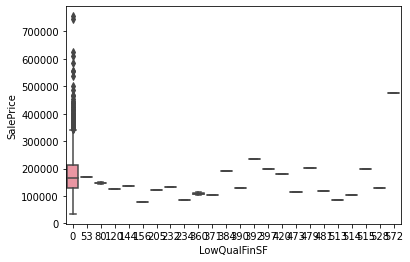

In [18]:
import seaborn as sns
sns.boxplot(x = 'LowQualFinSF', y = 'SalePrice', data=train_pd)
#train_pd.groupby('Street')['SalePrice'].mean()

In [20]:
train_pd['LowQualFinSF'].nunique()

24

In [51]:
train_pd.groupby('Condition2').agg({"SalePrice": ["mean", "count", "max", "min"]})

SalePrice                      
                     mean count     max     min
Condition2                                     
Artery      106500.000000     2  118000   95000
Feedr       121166.666667     6  167500   79500
Norm        181169.405536  1445  755000   34900
PosA        325000.000000     1  325000  325000
PosN        284875.000000     2  385000  184750
RRAe        190000.000000     1  190000  190000
RRAn        136905.000000     1  136905  136905
RRNn         96750.000000     2  125000   68500

In [14]:
from statsmodels.formula.api import ols
def getOLS(data, predictor):
    result = ols(f"SalePrice ~ C({predictor})", data=data).fit()
    return result

In [47]:
new_train_pd = train_pd[train_pd['Condition2'] != "Norm"]

In [48]:
result = getOLS(new_train_pd, 'Condition2')

In [15]:
def cal_fpvalue_special_col(col_name):
    if train_pd[col_name].nunique() == 2:
        return float('inf')
    mode = train_pd[col_name].value_counts().index[0]
    new_train_pd = train_pd[train_pd[col_name] != mode]
    print(new_train_pd.shape)
    result_ols = getOLS(new_train_pd, col_name)
    return result_ols.f_pvalue


In [17]:
import pandas as pd
pd.Series([cal_fpvalue_special_col(col) for col in data_imputer.remove_cols], index = data_imputer.remove_cols)

(26, 81)
(26, 81)
(68, 81)
(24, 81)
(7, 81)


Street                inf
Utilities             inf
RoofMatl         0.079543
LowQualFinSF     0.000416
KitchenAbvGr     0.628450
ThirdSsnPorch    0.218816
PoolArea              NaN
dtype: float64

In [6]:
df['Alley'].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [ ]:
df[]

In [8]:
train_pd['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [8]:
train_pd.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [9]:
train_pd

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
pd.set_option('display.max_columns', 70)
pd.DataFrame(train_pd.nunique()).transpose()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1460,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,4,327,4,5,6,4,4,4,6,637,...,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


In [11]:
train_pd = train_pd.rename(columns = {"3SsnPorch": "ThreeeSsnPorch"})
train_pd.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
dtypes = train_pd.dtypes
dtypes[dtypes == "float64"]

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

In [13]:
dtypes['SalePrice']

dtype('int64')

In [14]:
train_pd[["MSSubClass", "SalePrice"]].groupby("MSSubClass")["SalePrice"].mean()

MSSubClass
20     185224.811567
30      95829.724638
40     156125.000000
45     108591.666667
50     143302.972222
60     239948.501672
70     166772.416667
75     192437.500000
80     169736.551724
85     147810.000000
90     133541.076923
120    200779.080460
160    138647.380952
180    102300.000000
190    129613.333333
Name: SalePrice, dtype: float64

In [15]:
import researchpy as rp
rp.summary_cont(train_pd['SalePrice'].groupby(train_pd['MSSubClass']))


,N,Mean,SD,SE,95% Conf.,Interval
MSSubClass,,,,,,
20,536,185224.811567,78782.189967,3402.872321,178548.951430,191900.671704
30,69,95829.724638,24857.110083,2992.444403,89921.564602,101737.884674
40,4,156125.000000,75747.799748,37873.899874,70408.295353,241841.704647
45,12,108591.666667,20231.723889,5840.395617,96635.481892,120547.851441
50,144,143302.972222,54851.983707,4570.998642,134312.543733,152293.400711
60,299,239948.501672,86579.909966,5007.045474,230118.240211,249778.763134
70,60,166772.416667,58206.545762,7514.432746,151919.836930,181624.996404
75,16,192437.500000,100556.762577,25139.190644,141548.756870,243326.243130
80,58,169736.551724,38197.808771,5015.618013,159820.081922,179653.021527


In [9]:
from statsmodels.formula.api import ols
results = ols('SalePrice ~ C(Alley)', data = train_pd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     35.56
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           4.90e-08
Time:                        17:16:32   Log-Likelihood:                -1083.9
No. Observations:                  91   AIC:                             2172.
Df Residuals:                      89   BIC:                             2177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.222e+05   5153.091     23.718      0.000    1.12e+05    1.32e+05
C(Alley)[T.Pave]  4.578e+04   7677.090      5.963      0.000    3.05e+04     6.1e+04
==============================================================================
Omnibus:                       10.670   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               28.438
Skew:                           0.102   Prob(JB):                     6.68e-07
Kurtosis:                       5.731   Cond. No.                         2.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
result2 = ols('SalePrice ~ C(Alley)', data = df).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     15.18
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           3.00e-07
Time:                        17:21:48   Log-Likelihood:                -18529.
No. Observations:                1460   AIC:                         3.706e+04
Df Residuals:                    1457   BIC:                         3.708e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.222e+05   1.11e+04     10.984      0.000       1e+05    1.44e+05
C(Alley)[T.None]  6.123e+04   1.13e+04      5.405      0.000     3.9e+04    8.35e+04
C(Alley)[T.Pave]  4.578e+04   1.66e+04      2.762      0.006    1.33e+04    7.83e+04
==============================================================================
Omnibus:                      612.504   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3535.316
Skew:                           1.877   Prob(JB):                         0.00
Kurtosis:                       9.635   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
results.mse_total

1837591464.014408

In [14]:
result2.mse_total

6311111264.297448

In [34]:
for col, pvalue in enumerate(results.pvalues):
    print(col, pvalue)

0 0.0
1 3.6600385734929035e-23
2 0.40290538820860566
3 0.00015783294125191346
4 1.5735063986404618e-10
5 8.107245407334332e-27
6 0.0506695483387308
7 0.6816971451342002
8 0.10613313853835632
9 0.017888786857600335
10 3.212366722497661e-07
11 0.05235447929125894
12 5.076095069002471e-07
13 0.0001844574740300455
14 2.0169903488927322e-05


In [17]:
import math
import numpy as np
np.std(results.resid)

68944.36756976064

In [36]:
uniq_count = train_pd.nunique()
uniq_count.describe()

count      81.000000
mean      120.395062
std       275.344769
min         2.000000
25%         4.000000
50%         6.000000
75%        25.000000
max      1460.000000
dtype: float64

In [19]:
import numpy
numpy.quantile(uniq_count, 0.75)

25.0

In [29]:
(uniq_count <= 25)['LotArea']

False

In [20]:
category_cols = uniq_count[uniq_count <= 25].index
category_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'ThreeeSsnPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [21]:
selected_cols = []
for col_name in category_cols:
    model_result = ols(f'SalePrice ~ C({col_name})', data = train_pd).fit()
    if model_result.f_pvalue < 0.05:
        selected_cols.append(col_name)

In [22]:
selected_cols

['MSSubClass',
 'MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolArea',
 'Fence',
 'SaleType',
 'SaleCondition']

In [7]:
test_model = ols('SalePrice ~ C(Alley)', data = train_pd).fit()
test_model.summary()

NameError: name 'ols' is not defined

In [22]:
test_model = ols('SalePrice ~ C(MSSubClass) + C(MSZoning)', data = train_pd).fit()
test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     29.74
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           8.06e-86
Time:                        17:29:37   Log-Likelihood:                -18313.
No. Observations:                1460   AIC:                         3.666e+04
Df Residuals:                    1441   BIC:                         3.677e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.044e+05    2.2e+04      4.736      0.000    6.11e+04    1.48e+05
C(MSSubClass)[T.30]  -7.155e+04   9211.016     -7.768      0.000   -8.96e+04   -5.35e+04
C(MSSubClass)[T.40]  -1.339e+04   3.44e+04     -0.390      0.697   -8.08e+04    5.41e+04
C(MSSubClass)[T.45]  -5.542e+04   2.03e+04     -2.731      0.006   -9.52e+04   -1.56e+04
C(MSSubClass)[T.50]  -2.848e+04   6763.228     -4.212      0.000   -4.18e+04   -1.52e+04
C(MSSubClass)[T.60]   5.259e+04   4959.018     10.606      0.000    4.29e+04    6.23e+04
C(MSSubClass)[T.70]  -1895.7470   9695.608     -0.196      0.845   -2.09e+04    1.71e+04
C(MSSubClass)[T.75]   2.701e+04   1.77e+04      1.525      0.127   -7729.916    6.17e+04
C(MSSubClass)[T.80]  -1.612e+04   9440.180     -1.708      0.088   -3.46e+04    2393.914
C(MSSubClass)[T.85]  -3.805e+04   1.55e+04     -2.447      0.015   -6.85e+04   -7551.221
C(MSSubClass)[T.90]  -4.662e+04   9979.338     -4.672      0.000   -6.62e+04    -2.7e+04
C(MSSubClass)[T.120]  2.247e+04   8032.538      2.798      0.005    6717.461    3.82e+04
C(MSSubClass)[T.160] -3.834e+04   1.01e+04     -3.792      0.000   -5.82e+04   -1.85e+04
C(MSSubClass)[T.180] -5.087e+04   2.26e+04     -2.251      0.025   -9.52e+04   -6540.667
C(MSSubClass)[T.190] -3.932e+04   1.31e+04     -3.008      0.003    -6.5e+04   -1.37e+04
C(MSZoning)[T.FV]     1.007e+05   2.37e+04      4.248      0.000    5.42e+04    1.47e+05
C(MSZoning)[T.RH]     4.812e+04   2.77e+04      1.736      0.083   -6257.521    1.03e+05
C(MSZoning)[T.RL]     8.151e+04   2.19e+04      3.716      0.000    3.85e+04    1.25e+05
C(MSZoning)[T.RM]     4.882e+04   2.22e+04      2.197      0.028    5234.574    9.24e+04
==============================================================================
Omnibus:                      748.920   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6081.850
Skew:                           2.255   Prob(JB):                         0.00
Kurtosis:                      11.923   Cond. No.                         36.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
test_model.mse_total

6311111264.297448

In [25]:
test_model2 = ols('SalePrice ~ C(MSSubClass) + C(Alley)', data = train_pd).fit()
test_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     15.18
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           3.00e-07
Time:                        17:36:55   Log-Likelihood:                -18529.
No. Observations:                1460   AIC:                         3.706e+04
Df Residuals:                    1457   BIC:                         3.708e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.222e+05   1.11e+04     10.984      0.000       1e+05    1.44e+05
C(Alley)[T.None]  6.123e+04   1.13e+04      5.405      0.000     3.9e+04    8.35e+04
C(Alley)[T.Pave]  4.578e+04   1.66e+04      2.762      0.006    1.33e+04    7.83e+04
==============================================================================
Omnibus:                      612.504   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3535.316
Skew:                           1.877   Prob(JB):                         0.00
Kurtosis:                       9.635   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
test_model2.mse_total

6311111264.297448

In [25]:
np.std(test_model.resid)

27585.483275515056

In [39]:
train_pd.columns[1:]

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [53]:
from mix_selection import *
predictor_cols = train_pd.columns[1: -1]
target_col = train_pd.columns[-1]
select_tool = SelectionFeatures(ModelOLSStats)

In [ ]:
'OverallQual', 'GrLivArea', 'Neighborhood', 'PoolArea'

In [3]:
from code_preprocessing.preprocess import *
imputer = DataFrameImputer()
imputer = imputer.fit(train_pd)

TypeError: 'method' object is not subscriptable

In [13]:
imputer.is_category[['OverallQual','GrLivArea', 'Neighborhood', 'PoolArea']]

OverallQual      True
GrLivArea       False
Neighborhood     True
PoolArea         True
dtype: bool

In [66]:
from statsmodels.formula.api import ols
model1 = ols('SalePrice ~ GrLivArea', data = train_pd).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sat, 28 Mar 2020   Prob (F-statistic):          4.52e-223
Time:                        15:51:02   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
import math
math.sqrt(model1.ssr/model1.nobs)

56034.303865279944

In [68]:
model1.resid

0        6738.060312
1       27732.461129
2       13596.153031
3      -62511.852201
4       -4041.554863
            ...     
1455   -20012.727073
1456   -30650.259993
1457    -2754.065837
1458     8069.447178
1459    -5624.756718
Length: 1460, dtype: float64

In [98]:
predict1 = model1.predict(train_pd.iloc[[197, 810, 1170, 1182, 1298, 1386, 1423]]).rename('predict1')
predict2 = model2.predict(train_pd.iloc[[197, 810, 1170, 1182, 1298, 1386, 1423]]).rename('predict2')

In [103]:
pool = train_pd.iloc[[197, 810, 1170, 1182, 1298, 1386, 1423]]['PoolArea']
real = train_pd.iloc[[197, 810, 1170, 1182, 1298, 1386, 1423]]['SalePrice']


In [108]:
pd.concat([pool, real, predict1, predict2, predict2- predict1], axis=1)

,PoolArea,SalePrice,predict1,predict2,0
197,512,235000,351958.702958,235000.0,-116958.702958
810,648,181000,158802.665743,181000.0,22197.334257
1170,576,171000,138340.767180,171000.0,32659.232820
1182,555,745000,498084.512588,745000.0,246915.487413
1298,480,160000,622998.511142,160000.0,-462998.511142
1386,519,250000,316819.945217,250000.0,-66819.945217
1423,738,274970,254362.945940,274970.0,20607.054060


In [102]:
model2.params

Intercept              12887.682309
C(PoolArea)[T.480]   -479400.358769
C(PoolArea)[T.512]   -123457.949793
C(PoolArea)[T.519]    -72035.376614
C(PoolArea)[T.555]    235077.447107
C(PoolArea)[T.576]     33964.644475
C(PoolArea)[T.648]     22755.158264
C(PoolArea)[T.738]     17673.526324
GrLivArea                111.044430
dtype: float64

In [70]:
from statsmodels.formula.api import ols
model2 = ols('SalePrice ~ GrLivArea + C(PoolArea)', data = train_pd).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     208.6
Date:                Sat, 28 Mar 2020   Prob (F-statistic):          6.65e-235
Time:                        15:51:55   Log-Likelihood:                -17985.
No. Observations:                1460   AIC:                         3.599e+04
Df Residuals:                    1451   BIC:                         3.604e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.289e+04   4481.074      2.876      0.004    4097.607    2.17e+04
C(PoolArea)[T.480] -4.794e+05   5.56e+04     -8.625      0.000   -5.88e+05    -3.7e+05
C(PoolArea)[T.512] -1.235e+05   5.45e+04     -2.264      0.024    -2.3e+05   -1.65e+04
C(PoolArea)[T.519] -7.204e+04   5.45e+04     -1.323      0.186   -1.79e+05    3.48e+04
C(PoolArea)[T.555]  2.351e+05    5.5e+04      4.275      0.000    1.27e+05    3.43e+05
C(PoolArea)[T.576]  3.396e+04   5.44e+04      0.625      0.532   -7.27e+04    1.41e+05
C(PoolArea)[T.648]  2.276e+04   5.44e+04      0.419      0.676   -8.39e+04    1.29e+05
C(PoolArea)[T.738]  1.767e+04   5.44e+04      0.325      0.745    -8.9e+04    1.24e+05
GrLivArea            111.0444      2.816     39.431      0.000     105.520     116.569
==============================================================================
Omnibus:                      263.098   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1597.258
Skew:                           0.691   Prob(JB):                         0.00
Kurtosis:                       7.934   Cond. No.                     6.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
math.sqrt(model2.ssr /model2.nobs)

54161.94468074101

In [73]:
from statsmodels.stats.api import anova_lm
anova_table = anova_lm(model1, model2)
anova_table["Pr(>F)"][1]

1.913048513254655e-18

In [39]:
import pandas as pd
tmp = pd.concat([model1.resid, model2.resid, model1.resid - model2.resid], axis=1)
tmp[[2]].describe()

,2
count,1.460000e+03
mean,5.220799e-09
std,1.146555e+04
min,-3.580553e+05
25%,-1.227259e+03
50%,-1.233824e+02
75%,1.182271e+03
max,2.021839e+05


In [43]:
tmp[tmp[2] >= 2.021839e+05]

,0,1,2
1182,202183.948516,-4.051253e-08,202183.948516


In [46]:
model2.resid[abs(model2.resid) <= 1]

197    -2.997695e-08
810    -1.056469e-08
1170   -6.606570e-09
1182   -4.051253e-08
1298   -5.506445e-08
1386   -2.485467e-08
1423   -1.996523e-08
dtype: float64

In [50]:
train_pd[['PoolArea']].iloc[[197, 810, 1170, 1182, 1298, 1386, 1423]]

,PoolArea
197,512
810,648
1170,576
1182,555
1298,480
1386,519
1423,738


In [41]:
train_pd[['GrLivArea']].describe()

,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


In [ ]:
predictor_cols = ['GrLivArea']
target_col = 'SalePrice'

cv_model = SMWrapper(ModelOLSStats, predictor_cols, target_col, cols, col_levels)
cv = ShuffleSplit(n_splits=10, random_state=0)
cv_score = -np.mean(cross_val_score(cv_model, train_pd, train_pd[target_col], cv=cv, scoring="neg_mean_squared_error"))
logger.info(f"With {cols} - number_features = {len(cols)} - cv_score: {cv_score}")